[{'dt': 1661871600, 'main': {'temp': 296.76, 'feels_like': 296.98, 'temp_min': 296.76, 'temp_max': 297.87, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 933, 'humidity': 69, 'temp_kf': -1.11}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 0.62, 'deg': 349, 'gust': 1.18}, 'visibility': 10000, 'pop': 0.32, 'rain': {'3h': 0.26}, 'sys': {'pod': 'd'}, 'dt_txt': '2022-08-30 15:00:00'}, {'dt': 1661882400, 'main': {'temp': 295.45, 'feels_like': 295.59, 'temp_min': 292.84, 'temp_max': 295.45, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 931, 'humidity': 71, 'temp_kf': 2.61}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 96}, 'wind': {'speed': 1.97, 'deg': 157, 'gust': 3.39}, 'visibility': 10000, 'pop': 0.33, 'rain': {'3h': 0.57}, 'sys': {'pod': 'n'}, 'dt_txt': '2022-08-30 18:00:00'}, {'dt': 1661893200, 'main': {'temp': 292.46, 'feels_like': 292.5

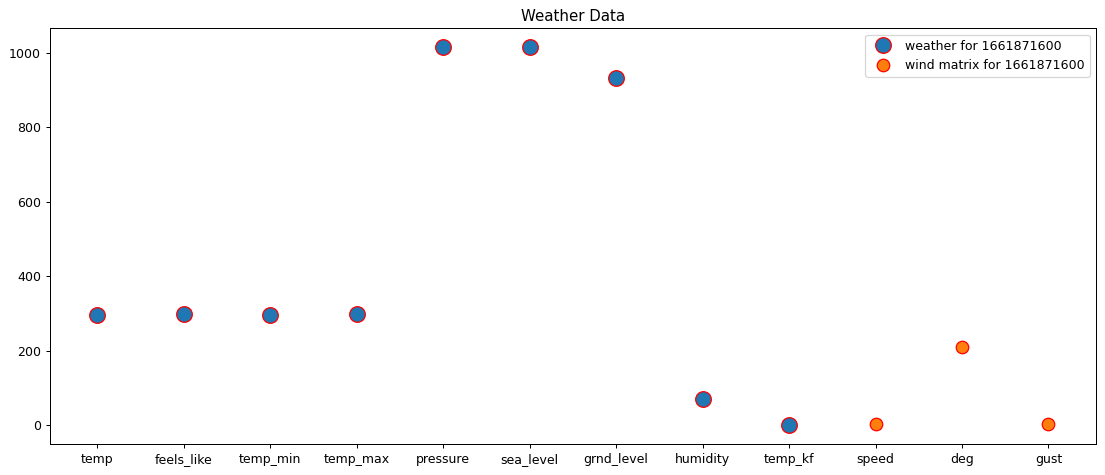

In [229]:

# building a weather casting api with python
import inspect
import json
import requests
import matplotlib.pyplot as plt
import time
import numpy as np
from collections import deque

# setting up the api
# includes api  requests and more.

#sending a request to the api

api_key = ""
base_url = ""


def send_request():
    
    city = input("Enter the city name :")
    
    request_url = f"{base_url}?appid={api_key}&q={city}"

    #get request 
    response = requests.get(request_url)

    if response.status_code == 200:

        #return a json format of the data
        response_data = response.json()
        return response_data
    
    else:
        print("API_REQUEST failed to complete")


with open('weather.json', 'r') as f:

    weather_data = json.load(f)
    print(weather_data['list'])

first_country = weather_data['list'][0]
second_country = weather_data['list'][1]
third_country = weather_data['list'][2]
fourth_country = weather_data['list'][3]


#plotting the data

def return_key(dictn, key):
    key_list = deque([])
    for key in dictn[key]:
        key_list.append(key)
    return key_list


def return_value(dictn, key):
    temp_list = deque([])
    for value in dictn[key]:
        temp_list.append(dictn[key][value])
    return temp_list



plt.figure(figsize=(15,6), dpi=90)

plt.plot(return_key(first_country, 'main'),return_value(first_country, 'main'), marker=".", linewidth = 0, markersize='25',
         markeredgecolor = 'red', label=f"weather for {first_country['dt']}", )

plt.plot(return_key(first_country, 'wind'),return_value(third_country, 'wind'), marker=".", linewidth = 0, 
         markersize='20', markeredgecolor = 'red', label=f"wind matrix for {first_country['dt']}", )

plt.savefig(f"{first_country['dt']}_analytics.png", dpi=400)

plt.title('Weather Data')

plt.legend()


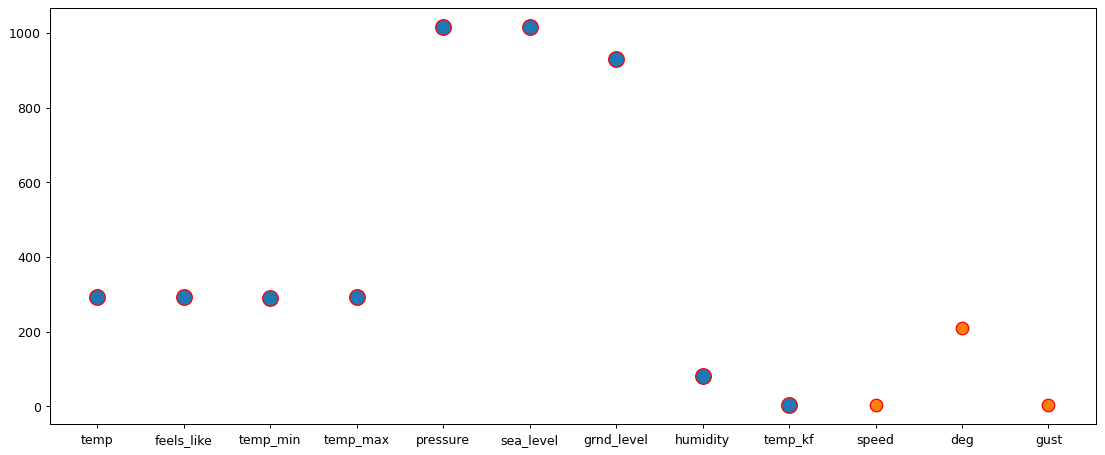

In [216]:

plt.figure(figsize=(15,6), dpi=90)

plt.plot(return_key(third_country, 'main'),return_value(third_country, 'main'), marker=".", linewidth = 0, 
         markersize='25', markeredgecolor = 'red', label=f"weather for {third_country['dt']}", )

plt.plot(return_key(third_country, 'wind'),return_value(third_country, 'wind'), marker=".", linewidth = 0, 
         markersize='20', markeredgecolor = 'red', label=f"wind matrix for {third_country['dt']}", )

plt.savefig(f"{third_country['dt']}_analytics.png", dpi=400)
